In [2]:
import scanpy as sc
import pandas as pd
import scipy.io
import os

## Head and Neck

#### 1.Chen2020

In [90]:

# Base path
base_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Chen2020_Head-and-Neck/"

# Step 1: Read expression matrix
adata = sc.read_mtx(os.path.join(base_path, "Exp_data_UMIcounts.mtx"))
adata = adata.transpose()  # Transpose to shape: cells × genes

# Step 2: Add gene names
genes = pd.read_csv(os.path.join(base_path, "Genes.txt"), header=None)
adata.var_names = genes[0].values
adata.var_names_make_unique()

# Step 3: Read and merge cell + sample metadata
cells = pd.read_csv(os.path.join(base_path, "Cells.csv"))
samples = pd.read_csv(os.path.join(base_path, "Samples.csv"))

# Merge on the shared 'sample' column
cells_merged = cells.merge(samples, on="sample", how="left")

# Assign merged metadata to AnnData
adata.obs = cells_merged

# Final check
print(adata)
#print(adata.obs.head())


AnnData object with n_obs × n_vars = 71896 × 36695
    obs: 'cell_name', 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age', 'smoking_status', 'PY', 'diagnosis_recurrence', 'disease_extent', 'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'sample_primary_met', 'size', 'site', 'histology', 'genetic_hormonal_features', 'grade', 'KI67', 'treated_naive', 'chemotherapy_exposed', 'chemotherapy_response', 'targeted_rx_exposed', 'targeted_rx_response', 'ICB_exposed', 'ICB_response', 'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed', 'post_sampling_rx_response', 'PFS_DFS', 'OS'


In [89]:
adata.obs

,cell_name,sample,cell_type,complexity,umap1,umap2,g1s_score,g2m_score,cell_cycle_phase,mp_top_score,...,targeted_rx_response,ICB_exposed,ICB_response,ET_exposed,ET_response,time_end_of_rx_to_sampling,post_sampling_rx_exposed,post_sampling_rx_response,PFS_DFS,OS
0,P01_AAACCTGAGGACACCA-1,P01,Malignant,6791,-34.0794,3.0856,1.3289,0.5607,G1/S,0.5352,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
1,P01_AAACCTGCAAGTCTGT-1,P01,NK_cell,1285,7.6761,5.8253,-0.1174,0.0607,Not cycling,NaN,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
2,P01_AAACCTGCACCGAAAG-1,P01,B_cell,1888,-3.6098,22.5997,0.0182,0.0912,Not cycling,1.0740,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
3,P01_AAACCTGCAGTATAAG-1,P01,NK_cell,2493,-13.9525,28.7780,-0.0270,-0.1177,Not cycling,NaN,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
4,P01_AAACCTGCATGCATGT-1,P01,B_cell,1450,-3.8275,24.4123,-0.1877,0.0822,Not cycling,1.5806,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71891,P15_TTTGTCAGTGAGGCTA-1,P15,B_cell,1056,-14.4151,-1.8858,0.2119,0.0449,Not cycling,2.0560,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
71892,P15_TTTGTCAGTGTGGTTT-1,P15,B_cell,1064,7.8341,-16.4783,0.0005,-0.0725,Not cycling,1.0813,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
71893,P15_TTTGTCAGTTATTCTC-1,P15,NK_cell,2069,21.9088,-5.1721,-0.1506,0.2420,Not cycling,NaN,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN
71894,P15_TTTGTCATCGCATGGC-1,P15,B_cell,1569,-17.1969,-2.4713,0.0450,-0.0509,Not cycling,1.2645,...,not exposed,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN


In [94]:
adata.obs['cancer_type'].value_counts()

cancer_type
Nasopharyngeal Carcinoma    71896
Name: count, dtype: int64

In [92]:
adata.obs['study'] = 'Chen2020_Head-and-Neck'

In [93]:
adata.obs['category'] = 'Head-and-Neck'

In [95]:
for col in ['umap1', 'umap2', 'g1s_score', 'g2m_score', 'mp_top_score', 'mp_top', 
            'mp_assignment', 'ebv', 'smoking_status', 'PY', 'diagnosis_recurrence', 
            'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'size', 'histology','grade', 'KI67',
            'genetic_hormonal_features', 'chemotherapy_exposed', 'chemotherapy_response',
            'targeted_rx_exposed', 'targeted_rx_response','ICB_exposed', 'ICB_response', 
            'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed', 
            'post_sampling_rx_response', 'PFS_DFS', 'OS'    
           ]:
    if col in adata.obs.columns:
        del adata.obs[col]

In [98]:
adata.obs['cell_subtype'] = 'NaN'

In [131]:
adata.obs['source'] = 'NaN'

In [99]:
adata

AnnData object with n_obs × n_vars = 71896 × 36695
    obs: 'cell_name', 'sample', 'cell_type', 'complexity', 'cell_cycle_phase', 'technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age', 'disease_extent', 'sample_primary_met', 'site', 'treated_naive', 'study', 'category', 'cell_subtype'

In [132]:
adata.obs.head()

,cell_name,sample,cell_type,complexity,cell_cycle_phase,technology,n_cells,patient,cancer_type,sex,age,disease_extent,sample_primary_met,site,treated_naive,study,category,cell_subtype,source
0,P01_AAACCTGAGGACACCA-1,P01,Malignant,6791,G1/S,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
1,P01_AAACCTGCAAGTCTGT-1,P01,NK_cell,1285,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
2,P01_AAACCTGCACCGAAAG-1,P01,B_cell,1888,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
3,P01_AAACCTGCAGTATAAG-1,P01,NK_cell,2493,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
4,P01_AAACCTGCATGCATGT-1,P01,B_cell,1450,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN


In [128]:
import gc
gc.collect()

0

In [134]:
output_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Chen2020_Head-and-Neck.h5ad"
adata.write(output_path)
print(f"✅ data saved to: {output_path}")

✅ data saved to: /home/ubuntu/Downloads/Data_Head-and-Neck/Data_Chen2020_Head-and-Neck.h5ad


In [133]:
adata.obs

,cell_name,sample,cell_type,complexity,cell_cycle_phase,technology,n_cells,patient,cancer_type,sex,age,disease_extent,sample_primary_met,site,treated_naive,study,category,cell_subtype,source
0,P01_AAACCTGAGGACACCA-1,P01,Malignant,6791,G1/S,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
1,P01_AAACCTGCAAGTCTGT-1,P01,NK_cell,1285,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
2,P01_AAACCTGCACCGAAAG-1,P01,B_cell,1888,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
3,P01_AAACCTGCAGTATAAG-1,P01,NK_cell,2493,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
4,P01_AAACCTGCATGCATGT-1,P01,B_cell,1450,Not cycling,10x,4335,P01,Nasopharyngeal Carcinoma,M,37,node positive,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71891,P15_TTTGTCAGTGAGGCTA-1,P15,B_cell,1056,Not cycling,10x,8809,P15,Nasopharyngeal Carcinoma,M,32,local,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
71892,P15_TTTGTCAGTGTGGTTT-1,P15,B_cell,1064,Not cycling,10x,8809,P15,Nasopharyngeal Carcinoma,M,32,local,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
71893,P15_TTTGTCAGTTATTCTC-1,P15,NK_cell,2069,Not cycling,10x,8809,P15,Nasopharyngeal Carcinoma,M,32,local,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN
71894,P15_TTTGTCATCGCATGGC-1,P15,B_cell,1569,Not cycling,10x,8809,P15,Nasopharyngeal Carcinoma,M,32,local,primary,nasopharynx,naive,Chen2020_Head-and-Neck,Head-and-Neck,NaN,NaN


#### 2.Cillo2020

In [54]:

# Base path
base_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Cillo2020_Head-and-Neck/"

# Step 1: Read expression matrix
adata = sc.read_mtx(os.path.join(base_path, "Exp_data_UMIcounts.mtx"))
adata = adata.transpose()  # Transpose to shape: cells × genes

# Step 2: Add gene names
genes = pd.read_csv(os.path.join(base_path, "Genes.txt"), header=None)
adata.var_names = genes[0].values
adata.var_names_make_unique()

# Step 3: Read and merge cell + sample metadata
cells = pd.read_csv(os.path.join(base_path, "Cells.csv"))
samples = pd.read_csv(os.path.join(base_path, "Samples.csv"))

# Merge on the shared 'sample' column
cells_merged = cells.merge(samples, on="sample", how="left")

# Assign merged metadata to AnnData
adata.obs = cells_merged

# Final check
#print(adata)
#print(adata.obs.head())


In [59]:
adata

AnnData object with n_obs × n_vars = 92569 × 24410
    obs: 'cell_name', 'sample', 'patient_x', 'cell_type', 'cell_subtype', 'complexity', 'cell_cycle_phase', 'source_x', 'disease', 'site_x', 'gender_x', 'age_x', 'cancer_type', 'technology', 'n_cells'

In [58]:
for col in ['umap1', 'umap2', 'g1s_score', 'g2m_score', 'mp_top_score', 'mp_top', 
            'mp_assignment', 'p16_status_x', 't_stage_x', 'n_stage_x', 'race_x',
            'tobacco_use_x', 'alcohol_use_x', 'patient_y', 'source_y',
            'site_y', 'p16_status_y', 't_stage_y', 'n_stage_y', 'gender_y', 'race_y',
            'age_y', 'tobacco_use_y', 'alcohol_use_y', 
            
           ]:
    if col in adata.obs.columns:
        del adata.obs[col]

In [57]:
adata.obs['n_stage_x'].value_counts() 

n_stage_x
n0     19831
n1     18596
n2b    12963
n2a     5594
n2c     4970
n3b     3730
nx      1743
Name: count, dtype: int64

In [79]:
adata.obs.head()

,cell_name,sample,patient,cell_type,cell_subtype,complexity,cell_cycle_phase,source,disease,site,sex,age,cancer_type,technology,n_cells,treated_naive,study,category
0,AAACCTGCACAGACTT_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD8Tn,1133,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck
1,AAACCTGCATCGGTTA_HD_1_PBMC,HD_1_PBMC,HD_1,Monocyte,Monocyte,974,NaN,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck
2,AAACCTGTCAAGCCTA_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD4Tn,1400,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck
3,AAACCTGTCTTAACCT_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD8Tem,1035,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck
4,AAACGGGCAATAGCGG_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD4Tn,1174,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck


In [63]:
adata.obs = adata.obs.rename(columns={"patient_x": "patient"})

In [65]:
adata.obs = adata.obs.rename(columns={"source_x": "source"})

In [66]:
adata.obs = adata.obs.rename(columns={"site_x": "site"})

In [67]:
adata.obs = adata.obs.rename(columns={"gender_x": "sex"})

In [68]:
adata.obs = adata.obs.rename(columns={"age_x": "age"})

In [72]:
adata.obs['treated_naive'] = 'untreated'

In [76]:
adata.obs['study'] = 'Cillo2020_Head-and-Neck'

In [77]:
adata.obs['category'] = 'Head-and-Neck'

In [86]:
adata.obs['disease_extent'] = 'NaN'

In [81]:
adata.obs

,cell_name,sample,patient,cell_type,cell_subtype,complexity,cell_cycle_phase,source,disease,site,sex,age,cancer_type,technology,n_cells,treated_naive,study,category,disease_extent
0,AAACCTGCACAGACTT_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD8Tn,1133,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
1,AAACCTGCATCGGTTA_HD_1_PBMC,HD_1_PBMC,HD_1,Monocyte,Monocyte,974,NaN,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
2,AAACCTGTCAAGCCTA_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD4Tn,1400,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
3,AAACCTGTCTTAACCT_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD8Tem,1035,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
4,AAACGGGCAATAGCGG_HD_1_PBMC,HD_1_PBMC,HD_1,T_cell,CD4Tn,1174,Not cycling,PBMC,Healthy,NaN,female,34,Normal,10x,2445,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92564,TTTGGTTCAAACAACA_HNSCC_9_PBMC,HNSCC_9_PBMC,HNSCC_9,Monocyte,Monocyte,571,NaN,PBMC,HNSCC,Oral cavity,male,80,Head and Neck Squamous Cell Carcinoma,10x,1743,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
92565,TTTGTCAAGACACGAC_HNSCC_9_PBMC,HNSCC_9_PBMC,HNSCC_9,T_cell,Tfh,878,NaN,PBMC,HNSCC,Oral cavity,male,80,Head and Neck Squamous Cell Carcinoma,10x,1743,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
92566,TTTGTCACACACAGAG_HNSCC_9_PBMC,HNSCC_9_PBMC,HNSCC_9,T_cell,CD4Tn,1566,Not cycling,PBMC,HNSCC,Oral cavity,male,80,Head and Neck Squamous Cell Carcinoma,10x,1743,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>
92567,TTTGTCATCGCCAAAT_HNSCC_9_PBMC,HNSCC_9_PBMC,HNSCC_9,Monocyte,Monocyte,1537,Not cycling,PBMC,HNSCC,Oral cavity,male,80,Head and Neck Squamous Cell Carcinoma,10x,1743,untreated,Cillo2020_Head-and-Neck,Head-and-Neck,<NA>


In [87]:
output_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Cillo2020_Head-and-Neck.h5ad"
adata.write(output_path)
print(f"✅ data saved to: {output_path}")

✅ data saved to: /home/ubuntu/Downloads/Data_Head-and-Neck/Data_Cillo2020_Head-and-Neck.h5ad


#### 3.Kürten2021

In [105]:

# Base path
base_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Kürten2021_Head-and-Neck/"

# Step 1: Read expression matrix
adata = sc.read_mtx(os.path.join(base_path, "Exp_data_UMIcounts.mtx"))
adata = adata.transpose()  # Transpose to shape: cells × genes

# Step 2: Add gene names
genes = pd.read_csv(os.path.join(base_path, "Genes.txt"), header=None)
adata.var_names = genes[0].values
adata.var_names_make_unique()

# Step 3: Read and merge cell + sample metadata
cells = pd.read_csv(os.path.join(base_path, "Cells.csv"))
samples = pd.read_csv(os.path.join(base_path, "Samples.csv"))

# Merge on the shared 'sample' column
cells_merged = cells.merge(samples, on="sample", how="left")

# Assign merged metadata to AnnData
adata.obs = cells_merged

gc.collect

# Final check
#print(adata)
#print(adata.obs.head())


<function gc.collect(generation=2)>

In [106]:
adata

AnnData object with n_obs × n_vars = 62700 × 33545
    obs: 'cell_name', 'sample', 'patient_x', 'cell_type', 'cell_subtype', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'hpv', 'hpv_score', 'patient_y', 'n_cells', 'technology', 'cancer_type', 'sex', 'age', 'smoking_status', 'PY', 'diagnosis_recurrence', 'disease_extent', 'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'sample_primary_met', 'size', 'site', 'histology', 'additional_tumor_characterisics', 'grade', 'KI67', 'treated_naive', 'chemotherapy_exposed', 'chemotherapy_response', 'targeted_rx_exposed', 'targeted_rx_response', 'ICB_exposed', 'ICB_response', 'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed', 'post_sampling_rx_response', 'PFS_DFS', 'OS'

In [111]:
for col in ['umap1', 'umap2', 'g1s_score', 'g2m_score', 'mp_top_score', 'mp_top', 
            'mp_assignment', 'hpv', 'hpv_score', 'patient_y', 'smoking_status', 'PY', 
            'diagnosis_recurrence', 'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage',
            'size',  'histology', 'additional_tumor_characterisics', 'grade', 'KI67',
            'chemotherapy_exposed', 'chemotherapy_response', 'targeted_rx_exposed',
            'targeted_rx_response', 'ICB_exposed', 'ICB_response',
            'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed',
            'post_sampling_rx_response', 'PFS_DFS', 'OS'         
           ]:
    if col in adata.obs.columns:
        del adata.obs[col]

In [110]:
adata.obs['OS'].value_counts()

Series([], Name: count, dtype: int64)

In [115]:
adata.obs.head()

,cell_name,sample,patient_x,cell_type,cell_subtype,complexity,cell_cycle_phase,n_cells,technology,cancer_type,sex,age,disease_extent,sample_primary_met,site,treated_naive,study,category
0,HN01_CD45p_AAACCTGAGCTCAACT-1,GSM5017022_HN01_CD45p,HN01,T_cell,T-NK-cell,1070,Not cycling,2168,10X,Head and Neck Squamous Cell Carcinoma,M,70-79,NaN,primary,Oral Cavity,naive,Cillo2020_Head-and-Neck,Head-and-Neck
1,HN01_CD45p_AAACCTGAGGCGATAC-1,GSM5017022_HN01_CD45p,HN01,T_cell,T-NK-cell,2002,G2/M,2168,10X,Head and Neck Squamous Cell Carcinoma,M,70-79,NaN,primary,Oral Cavity,naive,Cillo2020_Head-and-Neck,Head-and-Neck
2,HN01_CD45p_AAACCTGCACCAGATT-1,GSM5017022_HN01_CD45p,HN01,Dendritic,cDC,2102,Not cycling,2168,10X,Head and Neck Squamous Cell Carcinoma,M,70-79,NaN,primary,Oral Cavity,naive,Cillo2020_Head-and-Neck,Head-and-Neck
3,HN01_CD45p_AAACCTGCAGGTCGTC-1,GSM5017022_HN01_CD45p,HN01,T_cell,T-NK-cell,2759,G2/M,2168,10X,Head and Neck Squamous Cell Carcinoma,M,70-79,NaN,primary,Oral Cavity,naive,Cillo2020_Head-and-Neck,Head-and-Neck
4,HN01_CD45p_AAACCTGCATTAACCG-1,GSM5017022_HN01_CD45p,HN01,T_cell,T-NK-cell,1225,Not cycling,2168,10X,Head and Neck Squamous Cell Carcinoma,M,70-79,NaN,primary,Oral Cavity,naive,Cillo2020_Head-and-Neck,Head-and-Neck


In [113]:
adata.obs['study'] = 'Cillo2020_Head-and-Neck'

In [114]:
adata.obs['category'] = 'Head-and-Neck'

In [139]:
adata.obs['source'] = 'NaN'

In [116]:
adata.obs = adata.obs.rename(columns={"patient_x": "patient"})

In [141]:
output_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Kürten2021_Head-and-Neck.h5ad"
adata.write(output_path)
print(f"✅ data saved to: {output_path}")

✅ data saved to: /home/ubuntu/Downloads/Data_Head-and-Neck/Data_Kürten2021_Head-and-Neck.h5ad


#### 4.Puram2017

In [118]:

# Base path
base_path = "Data_Head-and-Neck/Data_Puram2017_Head-and-Neck/"

# Step 1: Read expression matrix
adata = sc.read_mtx(os.path.join(base_path, "Exp_data_UMIcounts.mtx"))
adata = adata.transpose()  # Transpose to shape: cells × genes

# Step 2: Add gene names
genes = pd.read_csv(os.path.join(base_path, "Genes.txt"), header=None)
adata.var_names = genes[0].values
adata.var_names_make_unique()

# Step 3: Read and merge cell + sample metadata
cells = pd.read_csv(os.path.join(base_path, "Cells.csv"))
samples = pd.read_csv(os.path.join(base_path, "Samples.csv"))

# Merge on the shared 'sample' column
cells_merged = cells.merge(samples, on="sample", how="left")

# Assign merged metadata to AnnData
adata.obs = cells_merged

gc.collect

# Final check
#print(adata)
#print(adata.obs.head())


<function gc.collect(generation=2)>

In [119]:
adata

AnnData object with n_obs × n_vars = 5902 × 23686
    obs: 'cell_name', 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'source', 'technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age', 'smoking_status', 'PY', 'diagnosis_recurrence', 'disease_extent', 'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'sample_primary_met', 'size', 'site', 'histology', 'genetic_hormonal_features', 'grade', 'KI67', 'treated_naive', 'chemotherapy_exposed', 'chemotherapy_response', 'targeted_rx_exposed', 'targeted_rx_response', 'ICB_exposed', 'ICB_response', 'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed', 'post_sampling_rx_response', 'PFS_DFS', 'OS'

In [120]:
for col in ['umap1', 'umap2', 'g1s_score', 'g2m_score', 'mp_top_score', 'mp_top', 
            'mp_assignment', 'smoking_status', 'PY', 
            'diagnosis_recurrence', 'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage',
            'size',  'histology', 'genetic_hormonal_features', 'grade', 'KI67',
            'chemotherapy_exposed', 'chemotherapy_response', 'targeted_rx_exposed',
            'targeted_rx_response', 'ICB_exposed', 'ICB_response',
            'ET_exposed', 'ET_response', 'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed',
            'post_sampling_rx_response', 'PFS_DFS', 'OS'         
           ]:
    if col in adata.obs.columns:
        del adata.obs[col]

In [126]:
adata.obs

,cell_name,sample,cell_type,complexity,cell_cycle_phase,source,technology,n_cells,patient,cancer_type,sex,age,disease_extent,sample_primary_met,site,treated_naive,study,category,cell_subtype
0,HN28_P15_D06_S330_comb,28,Fibroblast,4286,Not cycling,Lymph_node,SmartSeq2,616,MEEI28,Head and Neck Squamous Cell Carcinoma,F,82,NaN,primary,Right lateral tongue,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
1,HN28_P6_G05_S173_comb,28,Fibroblast,2723,Not cycling,Primary,SmartSeq2,616,MEEI28,Head and Neck Squamous Cell Carcinoma,F,82,NaN,primary,Right lateral tongue,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
2,HN26_P14_D11_S239_comb,26,Malignant,6965,Not cycling,Lymph_node,SmartSeq2,428,MEEI26,Head and Neck Squamous Cell Carcinoma,F,71,NaN,primary,Left floor of mouth,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
3,HN26_P14_H05_S281_comb,26,Fibroblast,3451,Not cycling,Lymph_node,SmartSeq2,428,MEEI26,Head and Neck Squamous Cell Carcinoma,F,71,NaN,primary,Left floor of mouth,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
4,HN26_P25_H09_S189_comb,26,Malignant,7355,Not cycling,Lymph_node,SmartSeq2,428,MEEI26,Head and Neck Squamous Cell Carcinoma,F,71,NaN,primary,Left floor of mouth,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,HNSCC17_P4_G12_S180_comb,17,Malignant,4801,Not cycling,Primary,SmartSeq2,663,MEEI17,Head and Neck Squamous Cell Carcinoma,F,63,NaN,primary,Right alveolar ridge,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
5898,HNSCC20_P13_C05_S221_comb,20,Malignant,5788,Not cycling,Lymph_node,SmartSeq2,691,MEEI20,Head and Neck Squamous Cell Carcinoma,F,77,NaN,primary,Right floor of mouth,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
5899,HNSCC17_P4_C12_S132_comb,17,Malignant,5375,G1/S,Primary,SmartSeq2,663,MEEI17,Head and Neck Squamous Cell Carcinoma,F,63,NaN,primary,Right alveolar ridge,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN
5900,HNSCC20_P3_H08_S92_comb,20,Malignant,5666,Not cycling,Primary,SmartSeq2,691,MEEI20,Head and Neck Squamous Cell Carcinoma,F,77,NaN,primary,Right floor of mouth,naive,Puram2017_Head-and-Neck,Head-and-Neck,NaN


In [122]:
adata.obs['study'] = 'Puram2017_Head-and-Neck'

In [123]:
adata.obs['category'] = 'Head-and-Neck'

In [125]:
adata.obs['cell_subtype'] = 'NaN'

In [127]:
output_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Puram2017_Head-and-Neck.h5ad"
adata.write(output_path)
print(f"✅ data saved to: {output_path}")

✅ data saved to: /home/ubuntu/Downloads/Data_Head-and-Neck/Data_Puram2017_Head-and-Neck.h5ad


#### Data merging

In [146]:
import scanpy as sc
import anndata
import os

# Define file paths
files = [
    "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Chen2020_Head-and-Neck.h5ad",
    "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Cillo2020_Head-and-Neck.h5ad",
    "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Kürten2021_Head-and-Neck.h5ad",
    "/home/ubuntu/Downloads/Data_Head-and-Neck/Data_Puram2017_Head-and-Neck.h5ad"
]

# Load datasets
adatas = [sc.read(file) for file in files]

# Merge all AnnData objects
adata_merged = anndata.concat(adatas, join="outer", fill_value=0)

# Fix non-string columns (e.g. 'sample') to avoid h5py write errors
for col in adata_merged.obs.columns:
    if adata_merged.obs[col].dtype == 'object':
        adata_merged.obs[col] = adata_merged.obs[col].astype(str)

# Save merged dataset
output_path = "/home/ubuntu/Downloads/Data_Head-and-Neck/Head-and-Neck_Combined.h5ad"
adata_merged.write(output_path)

print(f"✅ Merged and saved to: {output_path}")


/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


✅ Merged and saved to: /home/ubuntu/Downloads/Data_Head-and-Neck/Head-and-Neck_Combined.h5ad


In [5]:
adata

AnnData object with n_obs × n_vars = 233067 × 44265
    obs: 'cell_name', 'sample', 'cell_type', 'complexity', 'cell_cycle_phase', 'technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age', 'disease_extent', 'sample_primary_met', 'site', 'treated_naive', 'study', 'category', 'cell_subtype', 'source', 'disease'
    uns: 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [3]:
adata = sc.read('/home/ubuntu/Downloads/Data_Head-and-Neck/Head-and-Neck_Combined.h5ad')

/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/ubuntu/.local/lib/python3.10/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 44265 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


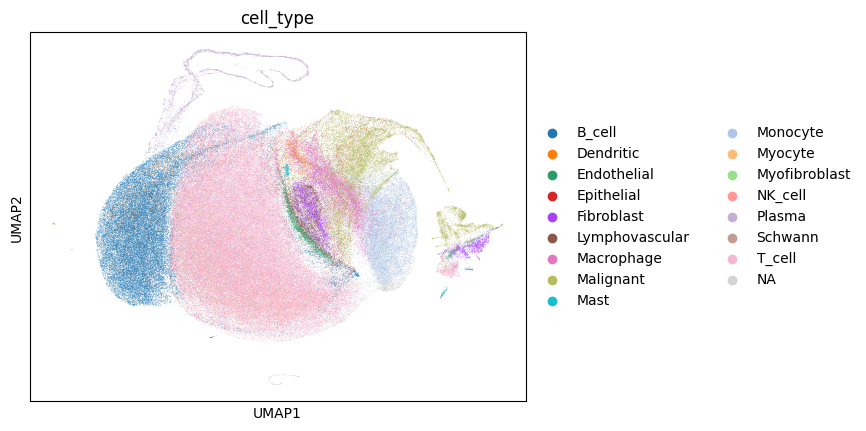

In [4]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='cell_type')  # if you want to color by cell type metadata

In [6]:
adata

AnnData object with n_obs × n_vars = 233067 × 44265
    obs: 'cell_name', 'sample', 'cell_type', 'complexity', 'cell_cycle_phase', 'technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age', 'disease_extent', 'sample_primary_met', 'site', 'treated_naive', 'study', 'category', 'cell_subtype', 'source', 'disease'
    uns: 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'